# Moduł 9.1

### Zadanie: Baza filmów

* Importy i wczytanie danych

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('C:\\Users\\dawid\\tmdb_movies.csv')
df2 = pd.read_csv('C:\\Users\\dawid\\tmdb_genres.csv')


In [3]:
df1 = df1.drop(df1.columns[0], axis=1)

* 1.  Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [4]:
df1.sort_values(by='vote_count', ascending=False)
df1['kwartyl'] = pd.qcut(df1['vote_count'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [5]:
df_q4 = df1[df1['kwartyl'] == 'Q4']


In [8]:
df_q4 = df_q4.sort_values(by='vote_average', ascending=False).head(10)


In [12]:
df_q4 = df_q4.reset_index(drop=True)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,kwartyl
0,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0,Q4
1,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0,Q4
2,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0,Q4
3,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0,Q4
4,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0,Q4
5,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0,Q4
6,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0,Q4
7,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0,Q4
8,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0,Q4
9,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0,Q4


* 2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

In [25]:
df_revenue = df1

In [26]:
df_revenue['release_date'] = pd.to_datetime(df_revenue['release_date'])

In [27]:
df_revenue = df1[(df1['release_date'] > '2010-01-01') & (df1['release_date'] < '2016-12-31')].copy()
df_revenue['year'] = df_revenue['release_date'].dt.year

In [33]:
average_budget = df_revenue.groupby('year')['budget'].mean()

In [34]:
average_revenue = df_revenue.groupby('year')['revenue'].mean()

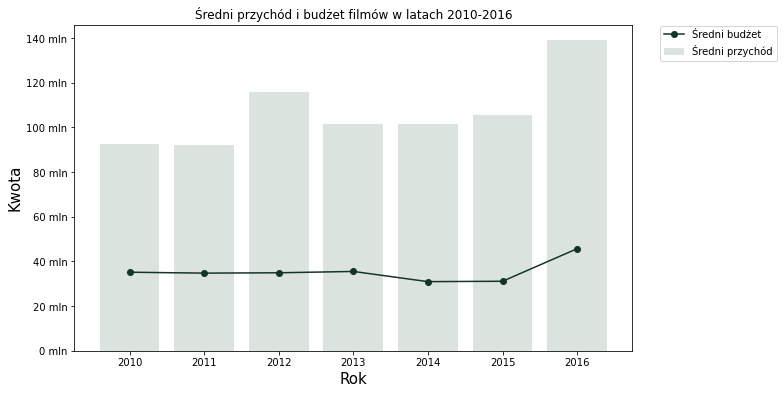

In [62]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(average_revenue.index, average_revenue.values, label='Średni przychód', color='#dbe3de')

plt.plot(average_budget.index, average_budget.values, label='Średni budżet', color='#123524', marker='o')

plt.title('Średni przychód i budżet filmów w latach 2010-2016')
plt.xlabel('Rok', size=15)
plt.ylabel('Kwota', size=15)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1_000_000)} mln'))

plt.legend(loc=(1.05 ,0.89))


* 3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [71]:
df2.rename(columns={'nowa_nazwa': 'genre_id'}, inplace=True)

In [73]:
df1 = df1.merge(df2[['genre_id', 'genres']], on='genre_id', how='left')

In [75]:
df1.rename(columns={'genres': 'genre'}, inplace=True)

In [77]:
df1.head()

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,kwartyl,genre
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Q4,Action
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Q4,Adventure
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Q4,Action
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Q4,Action
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Q4,Action


* 4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [80]:
df1['genre'].value_counts().idxmax()

'Drama'

In [102]:
df1['genre'].value_counts()['Drama']

1207

* 5. Filmy którego gatunku trwają średnio najdłużej (runtime)?

In [91]:
mean_runtime = df1.groupby('genre')['runtime'].mean()

In [99]:
max_runtime = mean_runtime.max()
max_genre_runtime = mean_runtime[mean_runtime == max_runtime]
max_genre_runtime

genre
History    133.96
Name: runtime, dtype: float64

* 6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

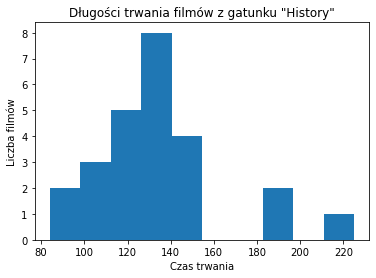

In [116]:
df_history = df1[df1['genre'] == 'History']

plt.hist(df_history['runtime'])
plt.xlabel('Czas trwania')
plt.ylabel('Liczba filmów')
plt.title('Długości trwania filmów z gatunku "History"')
plt.show()


#            The end